In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

/Users/ch/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
%matplotlib inline

In [2]:
from scipy.ndimage import gaussian_filter

In [3]:
import sys
sys.path.append('/Users/ch/K2/projects/cassino')
from cassino.background import BackgroundModel

In [4]:
from cassino.plotting import movie

In [5]:
tpf = lk.open('../data/tess-s0003-1-2_30.000000_-15.000000_100x100_astrocut.fits')

In [6]:
bg = BackgroundModel(tpf)

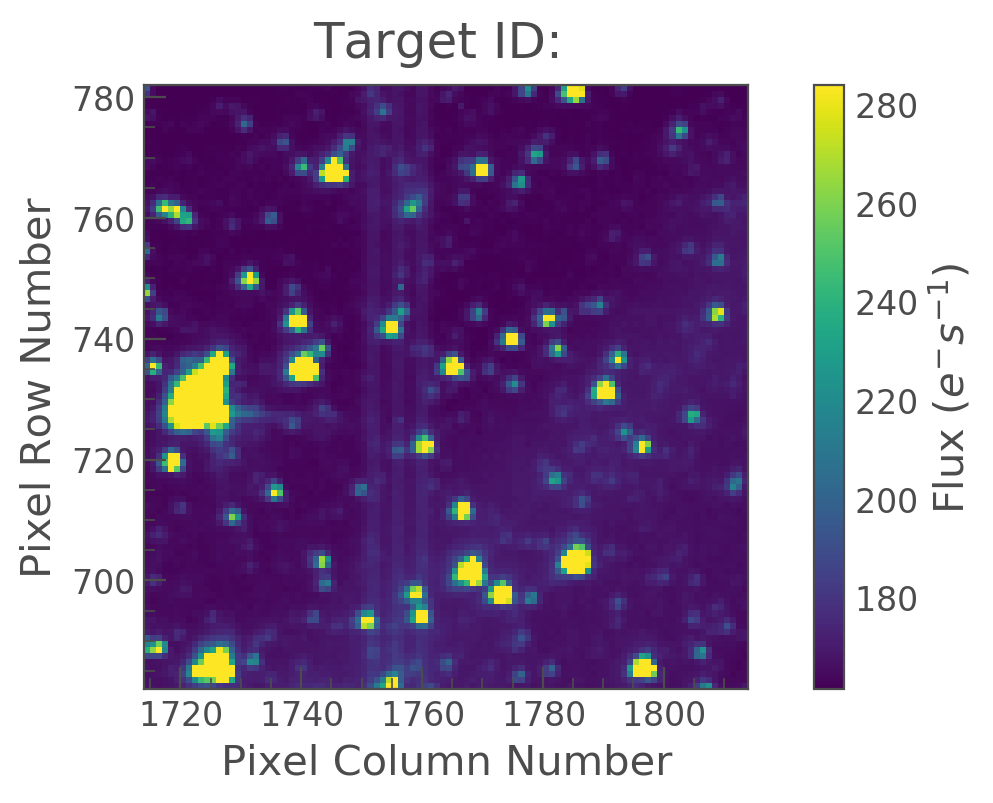

In [9]:
tpf.plot()

In [10]:
bg.compute()

masking: 100%|██████████| 100/100 [00:08<00:00, 11.41it/s]


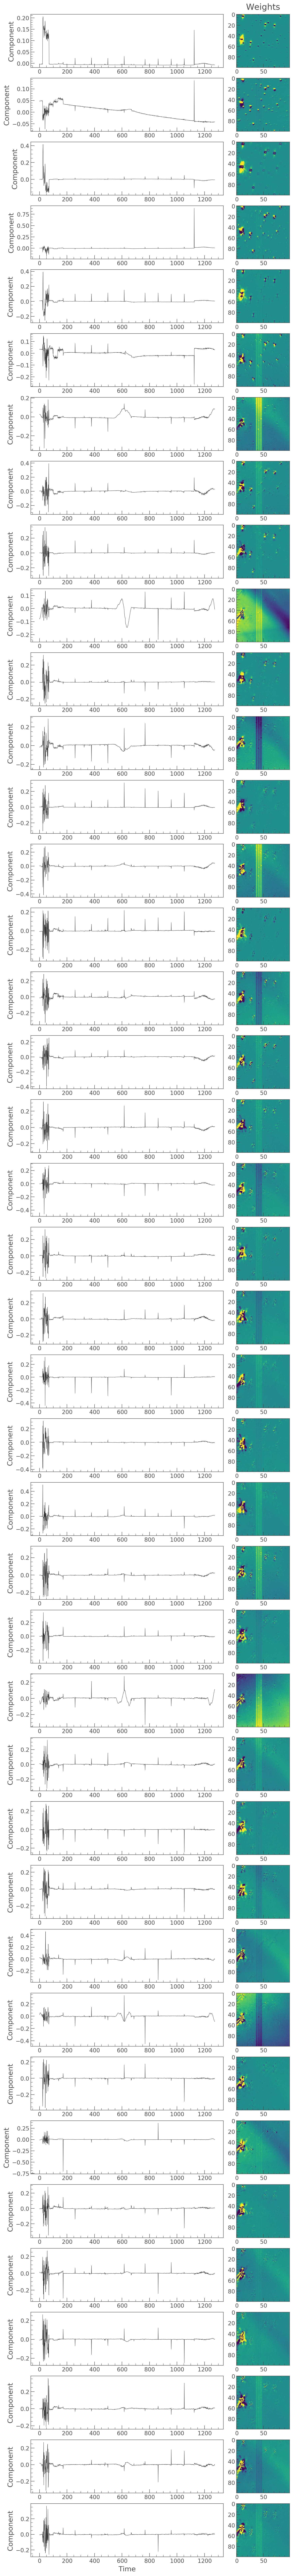

In [11]:
bg.plotComponents(ncomps=40);

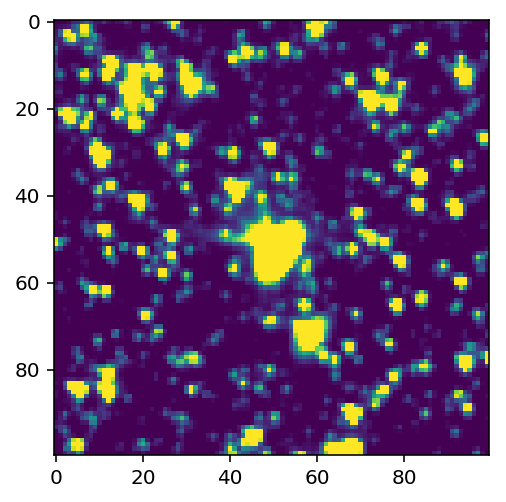

In [72]:
plt.imshow(bg.flux[100], vmin=0,  vmax=100)

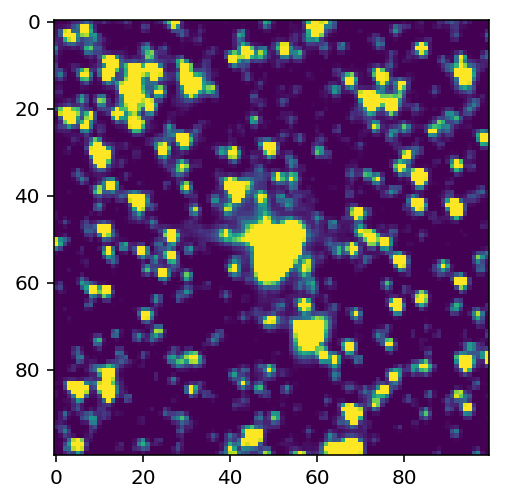

In [73]:
plt.imshow(bg.model[100], vmin=0,  vmax=100)

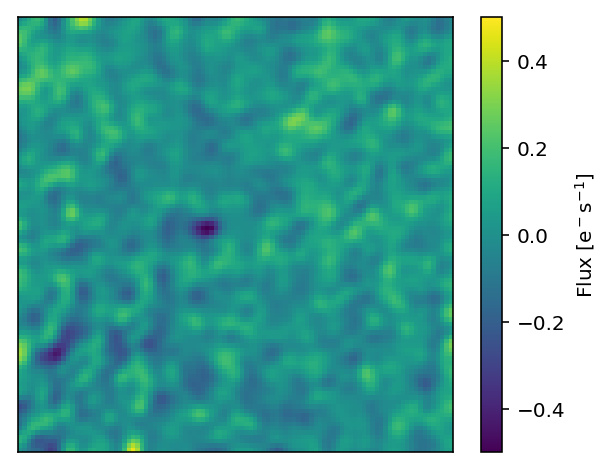

In [74]:
f = [gaussian_filter(b, 1.5) for b in bg.corrected_flux]
movie(f, 'pimenc.mp4', vmin=-0.5, vmax=0.5)